## Polynomial Regression

- Polynomial Regression: add powers of each feature as new features, then train a linear model on this extended set of features.

This notebook is my learning journal following the book: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, by Aurélien Géron (O’Reilly). Copyright 2019 Kiwisoft S.A.S., 978-1-492-03264-9.

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

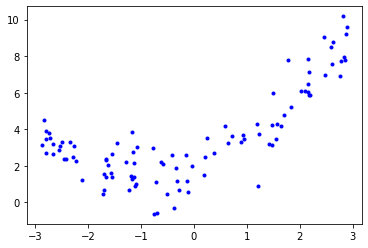

In [5]:
plt.plot(X, y, "b.")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Polynomial Features class to transform our training data, adding the square (seconddegree polynomial) of each feature in the training set as a new feature (in this case there is just one feature)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-2.11264731]
[-2.11264731  4.46327866]


In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88444464]), array([[0.92318324, 0.53519308]]))

In [10]:
y_predict = lin_reg.predict(X_poly)

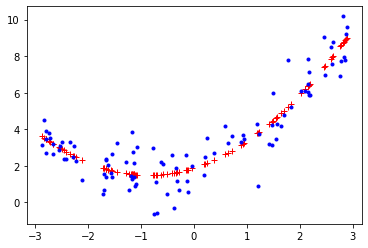

In [24]:
plt.plot(X, y_predict, "r+")
plt.plot(X, y, "b.")
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

(0.0, 3.0)

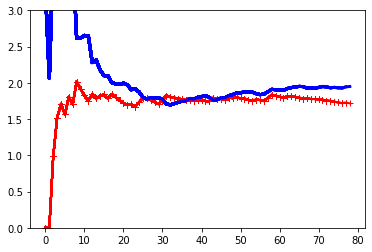

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.ylim(0,3)

- The error on the training data is much lower than with the Linear Regression model.
- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

(0.0, 2.0)

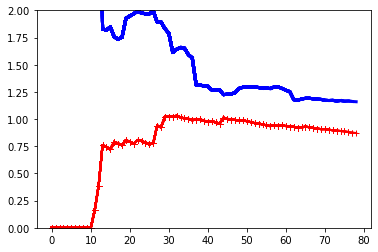

In [37]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 2)

- High bias is caused by underfit the training data.
- High variance is caused by overfit the training data.